### Importing the Libraries

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
print(tf.__version__)
print(tf.keras.__version__)


2.19.0
3.9.2


In [7]:
tf.__version__ 

'2.19.0'

### Part 1 - Data Preprocessing

#### Generating images for the Training set

In [8]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

#### Generating images for the Test set

In [9]:
test_datagen = ImageDataGenerator(rescale = 1./255)

### Creating the Training set

In [10]:
training_set = train_datagen.flow_from_directory('../dataSet/trainingData',                                
                                                 target_size = (128, 128),
                                                 batch_size = 10,
                                                 color_mode = 'grayscale',                                
                                                 class_mode = 'categorical')

Found 12845 images belonging to 27 classes.


In [11]:
test_set = test_datagen.flow_from_directory('../dataSet/testingData',
                                            target_size = (128, 128),                                  
                                            batch_size = 10,        
                                            color_mode = 'grayscale',
                                            class_mode = 'categorical')

Found 4268 images belonging to 27 classes.


### Part 2 - Building the CNN

#### Initializing the CNN

In [12]:
classifier = tf.keras.models.Sequential()

#### Step 1 - Convolution

In [13]:
classifier.add(tf.keras.layers.Conv2D(filters=32,
                                     kernel_size=3, 
                                     padding="same", 
                                     activation="relu", 
                                     input_shape=[128, 128, 1]))

c:\Users\tharu\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### Step 2 - Pooling

In [14]:
classifier.add(tf.keras.layers.MaxPool2D(pool_size=2, 
                                         strides=2, 
                                         padding='valid'))

#### Adding a second convolutional layer

In [15]:
classifier.add(tf.keras.layers.Conv2D(filters=32, 
                                      kernel_size=3, 
                                      padding="same", 
                                      activation="relu"))

classifier.add(tf.keras.layers.MaxPool2D(pool_size=2, 
                                         strides=2, 
                                         padding='valid'))

#### Step 3 - Flattening

In [16]:
classifier.add(tf.keras.layers.Flatten())

#### Step 4 - Full Connection

In [17]:
classifier.add(tf.keras.layers.Dense(units=128, 
                                     activation='relu'))
classifier.add(tf.keras.layers.Dropout(0.40))
classifier.add(tf.keras.layers.Dense(units=96, activation='relu'))
classifier.add(tf.keras.layers.Dropout(0.40))
classifier.add(tf.keras.layers.Dense(units=64, activation='relu'))
classifier.add(tf.keras.layers.Dense(units=27, activation='softmax')) # softmax for more than 2

### Part 3 - Training the CNN

#### Compiling the CNN

In [18]:
classifier.compile(optimizer = 'adam', 
                   loss = 'categorical_crossentropy', 
                   metrics = ['accuracy'])

#### Training the CNN on the Training set and evaluating it on the Test set

In [19]:
classifier.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 96)             │        12,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 27)             │         1,755 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,224,347 (16.11 MB)

 Trainable params: 4,224,347 (16.11 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
classifier.fit(training_set,
                  epochs = 5,
                  validation_data = test_set)

Epoch 1/5


c:\Users\tharu\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1285/1285 ━━━━━━━━━━━━━━━━━━━━ 58s 44ms/step - accuracy: 0.1759 - loss: 2.7806 - val_accuracy: 0.8880 - val_loss: 0.3320
Epoch 2/5
1285/1285 ━━━━━━━━━━━━━━━━━━━━ 50s 39ms/step - accuracy: 0.7064 - loss: 0.8555 - val_accuracy: 0.9496 - val_loss: 0.1356
Epoch 3/5
1285/1285 ━━━━━━━━━━━━━━━━━━━━ 47s 36ms/step - accuracy: 0.8036 - loss: 0.5814 - val_accuracy: 0.9775 - val_loss: 0.0808
Epoch 4/5
1285/1285 ━━━━━━━━━━━━━━━━━━━━ 46s 36ms/step - accuracy: 0.8495 - loss: 0.4482 - val_accuracy: 0.9913 - val_loss: 0.0423
Epoch 5/5
1285/1285 ━━━━━━━━━━━━━━━━━━━━ 48s 38ms/step - accuracy: 0.8732 - loss: 0.3581 - val_accuracy: 0.9845 - val_loss: 0.0466


#### Saving the Model

In [21]:
classifier.save('asl_to_text_advanced.h5')  # can also use 'model_full.keras'
print("Full model saved.")


Full model saved.


Model loaded successfully.
Found 4268 images belonging to 27 classes.

Class label mapping: {0: '0', 1: 'A', 2: 'B', 3: 'C', 4: 'D', 5: 'E', 6: 'F', 7: 'G', 8: 'H', 9: 'I', 10: 'J', 11: 'K', 12: 'L', 13: 'M', 14: 'N', 15: 'O', 16: 'P', 17: 'Q', 18: 'R', 19: 'S', 20: 'T', 21: 'U', 22: 'V', 23: 'W', 24: 'X', 25: 'Y', 26: 'Z'}


c:\Users\tharu\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


134/134 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9907 - loss: 0.0326

Test Accuracy: 98.45%
134/134 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       154
           A       1.00      1.00      1.00       156
           B       0.96      1.00      0.98       157
           C       1.00      1.00      1.00       156
           D       1.00      0.99      1.00       155
           E       1.00      1.00      1.00       156
           F       1.00      0.96      0.98       165
           G       1.00      1.00      1.00       153
           H       1.00      1.00      1.00       165
           I       1.00      1.00      1.00       157
           J       1.00      1.00      1.00       166
           K       0.98      0.90      0.94       164
           L       1.00      1.00      1.00       155
           M       1.00      0.96      0.98       165
           N       0.90 

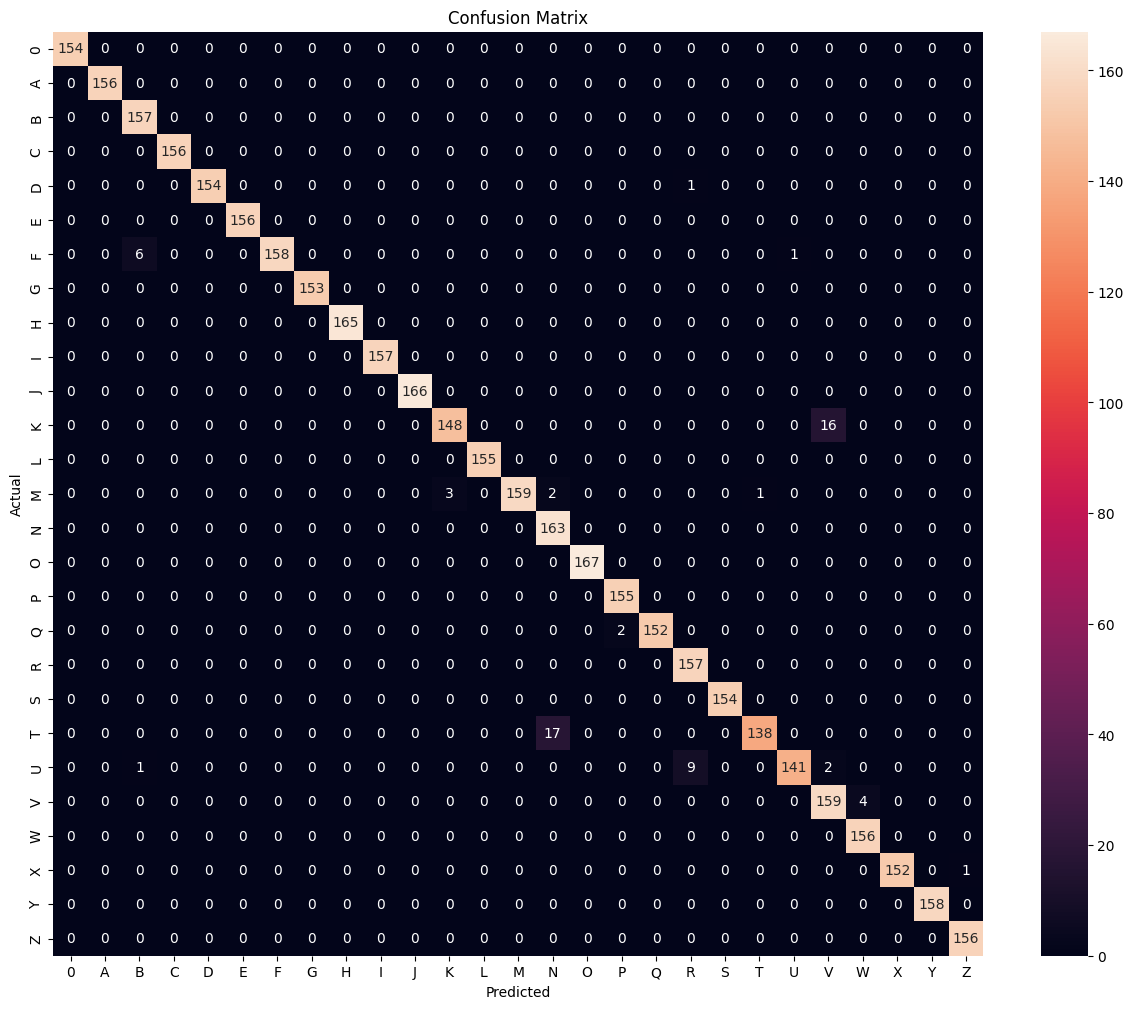


Manual Testing Section
---------------------
No valid image path provided, skipping manual test.

Random Sample Predictions from Test Set:
Image 2196: Predicted = M, Actual = M, Correct = True
Image 3054: Predicted = S, Actual = S, Correct = True
Image 2017: Predicted = L, Actual = L, Correct = True
Image 1451: Predicted = I, Actual = I, Correct = True
Image 1834: Predicted = K, Actual = K, Correct = True
Image 624: Predicted = D, Actual = D, Correct = True
Image 382: Predicted = B, Actual = B, Correct = True
Image 1117: Predicted = G, Actual = G, Correct = True
Image 2452: Predicted = O, Actual = O, Correct = True
Image 3158: Predicted = S, Actual = S, Correct = True
Image 1448: Predicted = I, Actual = I, Correct = True
Image 1624: Predicted = J, Actual = J, Correct = True
Image 49: Predicted = 0, Actual = 0, Correct = True
Image 781: Predicted = E, Actual = E, Correct = True
Image 3197: Predicted = T, Actual = T, Correct = True
Image 4071: Predicted = Y, Actual = Y, Correct = True
I

In [25]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import numpy as np
import os
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load model
model = load_model('asl_to_text_advanced.h5')
print("Model loaded successfully.")

# Prepare the test data
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    '../dataSet/testingData',
    target_size=(128, 128),
    batch_size=32,
    color_mode='grayscale',
    class_mode='categorical',
    shuffle=False
)

# Map class indices
class_indices = test_generator.class_indices
idx_to_label = {v: k for k, v in class_indices.items()}
print("\nClass label mapping:", idx_to_label)

# Evaluate model
test_generator.reset()
loss, accuracy = model.evaluate(test_generator, verbose=1)
print(f"\nTest Accuracy: {accuracy * 100:.2f}%")

# Get predictions for all test images
test_generator.reset()
predictions = model.predict(test_generator, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes

# Classification report
print("\nClassification Report:")
print(classification_report(true_classes, predicted_classes, target_names=list(class_indices.keys())))

# Confusion matrix
conf_mat = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(15, 12))
sns.heatmap(conf_mat, annot=True, fmt='d', 
            xticklabels=list(class_indices.keys()), 
            yticklabels=list(class_indices.keys()))
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Manual test function for specific images
def test_single_image(image_path):
    """Test a specific image manually"""
    try:
        # Load and preprocess the image
        img = load_img(image_path, target_size=(128, 128), color_mode='grayscale')
        img_array = img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)
        
        # Make prediction
        prediction = model.predict(img_array, verbose=0)
        predicted_class = np.argmax(prediction[0])
        confidence = np.max(prediction[0])
        
        # Display results
        plt.imshow(img, cmap='gray')
        plt.title(f"Predicted: {idx_to_label[predicted_class]} ({confidence:.2%})\nFile: {os.path.basename(image_path)}")
        plt.axis('off')
        plt.show()
        
        print("\nTop Predictions:")
        sorted_indices = np.argsort(prediction[0])[::-1]
        for i in sorted_indices[:5]:  # Show top 5 predictions
            print(f"{idx_to_label[i]}: {prediction[0][i]:.2%}")
            
        return idx_to_label[predicted_class]
    except Exception as e:
        print(f"Error processing image: {e}")
        return None

# Example usage of manual test
print("\nManual Testing Section")
print("---------------------")
test_image_path = '96.jpg'
if test_image_path and os.path.exists(test_image_path):
    print(f"\nTesting image: {test_image_path}")
    test_single_image(test_image_path)
else:
    print("No valid image path provided, skipping manual test.")

# Show random sample predictions
print("\nRandom Sample Predictions from Test Set:")
test_generator.reset()
random_indices = np.random.choice(len(true_classes), 20, replace=False)
for i in random_indices:
    print(f"Image {i}: Predicted = {idx_to_label[predicted_classes[i]]}, "
          f"Actual = {idx_to_label[true_classes[i]]}, "
          f"Correct = {predicted_classes[i] == true_classes[i]}")

In [9]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load your trained model
model = load_model('asl_to_text_advanced.h5')

def preprocess_image(image):
    """
    Preprocess image exactly like the reference GitHub project
    Produces clean black hand on white background
    """
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply Gaussian blur
    blur = cv2.GaussianBlur(gray, (5, 5), 2)
    
    # Apply adaptive threshold - this is the key step from the reference project
    thresh = cv2.adaptiveThreshold(blur, 255, 
                                 cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                 cv2.THRESH_BINARY_INV, 
                                 11, 2)
    
    # Apply Otsu's thresholding to clean up the image
    ret, final = cv2.threshold(thresh, 70, 255, 
                             cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    
    return final

def prepare_for_model(image):
    """Prepare the processed image for model input"""
    # Resize to model's expected input
    resized = cv2.resize(image, (128, 128))
    
    # Normalize and add channel dimension
    normalized = resized.astype('float32') / 255.0
    final_image = np.expand_dims(normalized, axis=-1)
    
    return final_image

def predict_sign_language(image):
    """Full processing and prediction pipeline"""
    # Step 1: Preprocess image
    processed_image = preprocess_image(image)
    
    # Step 2: Prepare for model
    model_input = prepare_for_model(processed_image)
    
    # Step 3: Make prediction
    prediction = model.predict(np.expand_dims(model_input, axis=0))
    predicted_class = np.argmax(prediction[0])
    confidence = np.max(prediction[0])
    
    return processed_image, predicted_class, confidence

def image_test(image_path):
    """Test with a single image from disk instead of camera feed"""
    import cv2
    import os

    if not os.path.exists(image_path):
        print(f"Image not found: {image_path}")
        return

    # Read and preprocess image
    frame = cv2.imread(image_path)
    frame = cv2.resize(frame, (640, 480))  # Resize for consistent display

    # Process and predict
    processed, pred_class, confidence = predict_sign_language(frame)

    # Overlay prediction text on original image
    cv2.putText(frame, f"Pred: {class_mapping[pred_class]} {confidence:.1%}",
                (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Create windows
    cv2.namedWindow("Original Image", cv2.WINDOW_NORMAL)
    cv2.namedWindow("Processed Image", cv2.WINDOW_NORMAL)

    # Show both images
    cv2.imshow("Original Image", frame)
    cv2.imshow("Processed Image", processed)

    print(f"Predicted: {class_mapping[pred_class]} ({confidence:.2%})")

    # Wait for key press before closing
    print("Press any key to close...")
    cv2.waitKey(0)
    cv2.destroyAllWindows()


# Class mapping
class_mapping = {
    0: '0', 1: 'A', 2: 'B', 3: 'C', 4: 'D', 5: 'E', 
    6: 'F', 7: 'G', 8: 'H', 9: 'I', 10: 'J',
    11: 'K', 12: 'L', 13: 'M', 14: 'N', 15: 'O',
    16: 'P', 17: 'Q', 18: 'R', 19: 'S', 20: 'T',
    21: 'U', 22: 'V', 23: 'W', 24: 'X', 25: 'Y', 26: 'Z'
}

# Start camera test
image_test('../X.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Predicted: Z (77.84%)
Press any key to close...
